### [Plot] Kolmogorov Forcing, Steady Solution Test [ ver. a2 ] (11/21)


- Starts from Zero Coefficients
- Small Re Number, Flow converges to Steady Solution

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Set Mathtext Fontset : Computer Modern
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'

In [2]:
plt.clf()

<Figure size 640x480 with 0 Axes>

### .dat Loader

In [3]:
def bin_mat_real(filename, datatype=np.double):
    with open(filename, 'rb') as f:
        # 最初の 8 バイトを読み込んでサイズ情報を取得
        Nx, Ny = np.fromfile(f, dtype=np.int32, count=2)
        # 残りのデータを読み込んで行列に変換
        mat = np.fromfile(f, dtype=datatype).reshape(Nx, Ny)
    return mat

def bin_mat_complex(filename, datatype=np.complex128):
    with open(filename, 'rb') as f:
        # 最初の 8 バイトを読み込んでサイズ情報を取得
        Nx, Ny = np.fromfile(f, dtype=np.int32, count=2)
        # 残りのデータを読み込んで行列に変換
        mat = np.fromfile(f, dtype=datatype).reshape(Nx, Ny)
    return mat

In [4]:
# Load Flow Field at Max Step
max_step    = 10000
path_u      = "./out/mid/u_" + str(max_step) + ".dat"
path_v      = "./out/mid/v_" + str(max_step) + ".dat"

# ** NOTE **
# Because We set coefficients for x axis at row direction,
# We must transpose Vector Fields before plot on xy plane !!!!
mat_u       = np.transpose(bin_mat_real(path_u))
mat_v       = np.transpose(bin_mat_real(path_v))

print("Max abs velocity for y direction is {0}.".format(np.max(np.abs(mat_v))))

# Experiment Value
gamma       = 0.01
nu          = 0.5
N           = 128

# Analytical Solution
xs          = np.linspace(0, 2 * np.pi, N + 1)
ys          = np.linspace(0, 2 * np.pi, N + 1)
X, Y        = np.meshgrid(xs, ys)

mat_u_sol   = gamma / nu * np.sin(Y)

Max abs velocity for y direction is 0.0.


### x - velocity (u experiment)

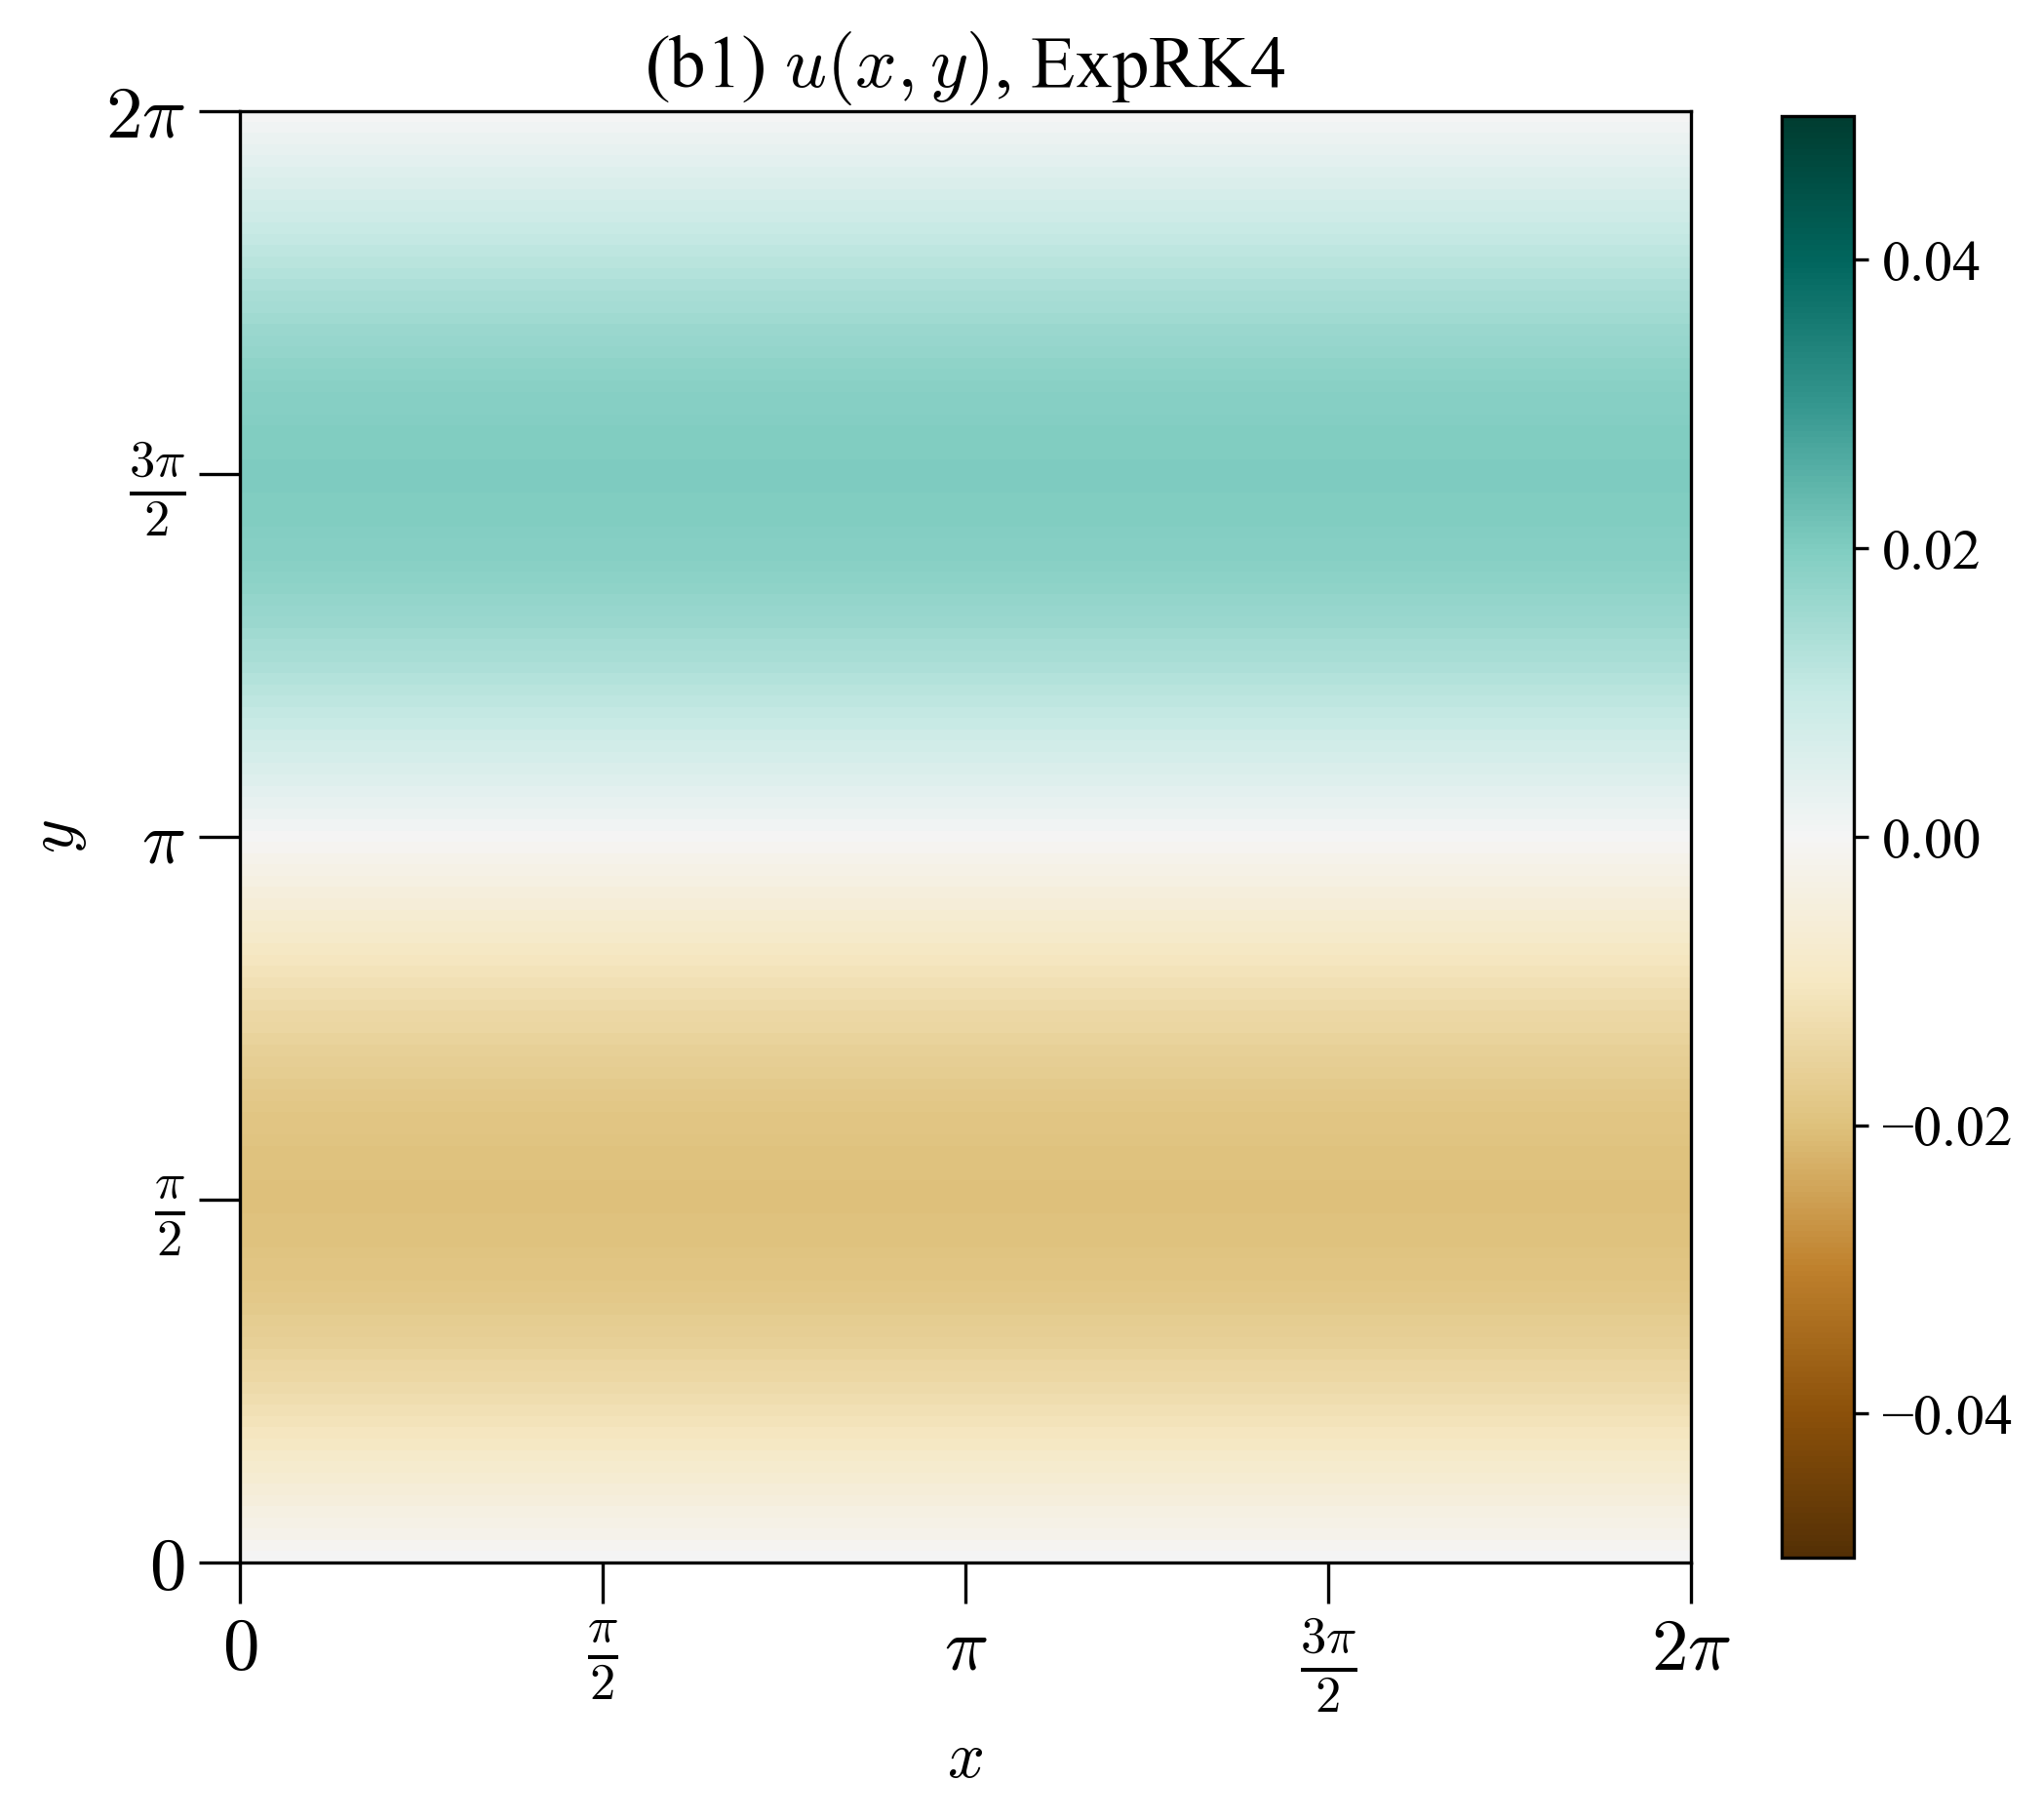

In [8]:
# Common Values
max_v           =  0.05
min_v           = -max_v
colorscheme     = "BrBG"

# Initialize
fig_CMap        = plt.figure(figsize=(8, 8), dpi=300)
ax_CMap         = fig_CMap.add_subplot()

ax_CMap.set_title(r'(b1) $u (x, y)$, ExpRK4', fontsize=18)
im              = ax_CMap.imshow(mat_u, aspect='equal', cmap=colorscheme, extent=[0, 2 * np.pi, 0, 2 * np.pi], vmin=min_v, vmax=max_v)

# XY Lim : 0 to 2 pi
ticks           = [np.pi / 2 * i for i in [0, 1, 2, 3, 4]]
ax_CMap.set_xticks(ticks)
ax_CMap.set_yticks(ticks)

ax_CMap.set_xlabel(r"$x$", fontsize=16)
ax_CMap.set_ylabel(r"$y$", fontsize=16)

ticklabels      = [r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2 \pi$"]

ax_CMap.set_xticklabels(ticklabels)
ax_CMap.set_yticklabels(ticklabels)

ax_CMap.tick_params(axis='x', labelsize=18)                 # Tick font size x
ax_CMap.tick_params(axis='y', labelsize=18)                 # Tick font size y
ax_CMap.tick_params(axis='x', which='major', length=10)     # Tick Length Major
ax_CMap.tick_params(axis='y', which='major', length=10)     # Tick Length Major

# Color bar
cbar = plt.colorbar(im, ax=ax_CMap, shrink=0.8)
cbar.ax.tick_params(labelsize=14)

fig_CMap.savefig("./figures/u_ExpAB3.pdf", format = "pdf")
fig_CMap.savefig("./figures/u_ExpAB3.png", format = "png", dpi = 300)
fig_CMap.savefig("./figures/u_ExpAB3.svg", format = "svg", transparent=True)

### x - velocity (u steady solution)

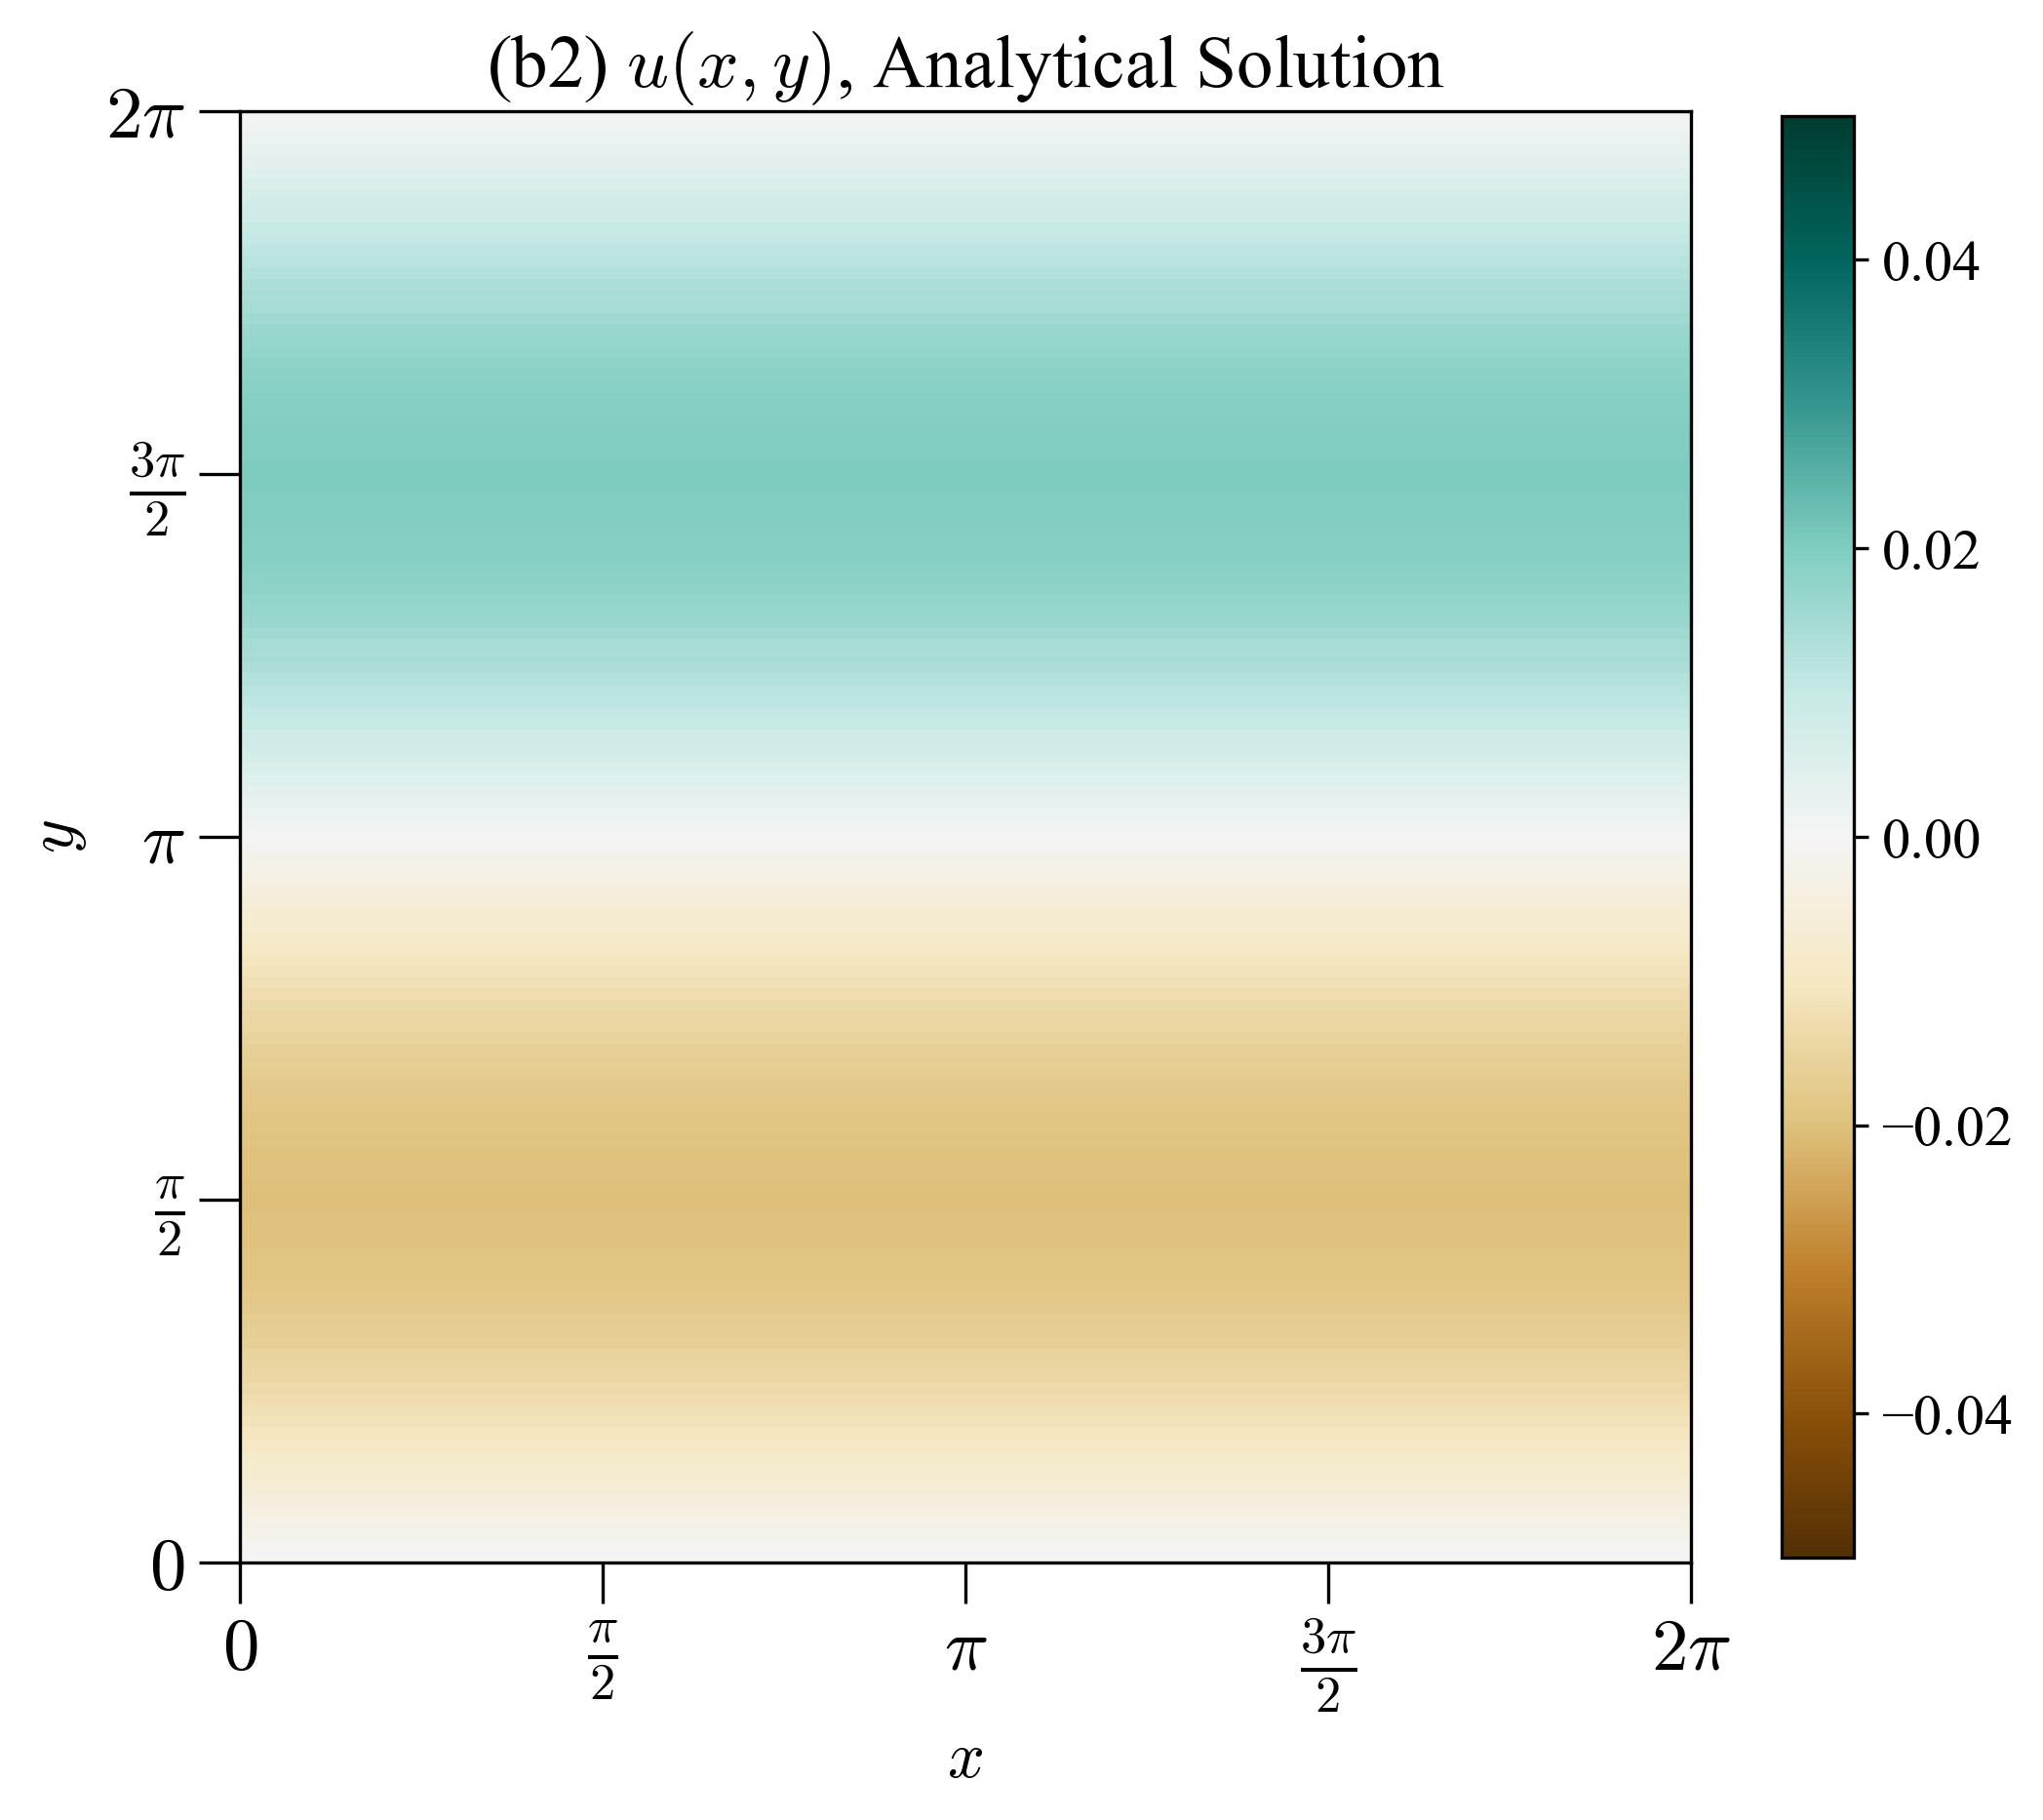

In [9]:
# Common Values
max_v           =  0.05
min_v           = -max_v
colorscheme     = "BrBG"

# Initialize
fig_CMap        = plt.figure(figsize=(8, 8), dpi=300)
ax_CMap         = fig_CMap.add_subplot()

ax_CMap.set_title(r'(b2) $u (x, y)$, Analytical Solution', fontsize=18)
im              = ax_CMap.imshow(mat_u_sol, aspect='equal', cmap=colorscheme, extent=[0, 2 * np.pi, 0, 2 * np.pi], vmin=min_v, vmax=max_v)


# XY Lim : 0 to 2 pi
ticks           = [np.pi / 2 * i for i in [0, 1, 2, 3, 4]]
ax_CMap.set_xticks(ticks)
ax_CMap.set_yticks(ticks)

ax_CMap.set_xlabel(r"$x$", fontsize=16)
ax_CMap.set_ylabel(r"$y$", fontsize=16)

ticklabels      = [r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2 \pi$"]

ax_CMap.set_xticklabels(ticklabels)
ax_CMap.set_yticklabels(ticklabels)

ax_CMap.tick_params(axis='x', labelsize=18)                 # Tick font size x
ax_CMap.tick_params(axis='y', labelsize=18)                 # Tick font size y
ax_CMap.tick_params(axis='x', which='major', length=10)     # Tick Length Major
ax_CMap.tick_params(axis='y', which='major', length=10)     # Tick Length Major

# Color bar
cbar = plt.colorbar(im, ax=ax_CMap, shrink=0.8)
cbar.ax.tick_params(labelsize=14)

fig_CMap.savefig("./figures/u_AnalyticalSolution.pdf", format = "pdf")
fig_CMap.savefig("./figures/u_AnalyticalSolution.png", format = "png", dpi = 300)
fig_CMap.savefig("./figures/u_AnalyticalSolution.svg", format = "svg", transparent=True)

### x - velocity (experiment - steady, difference)

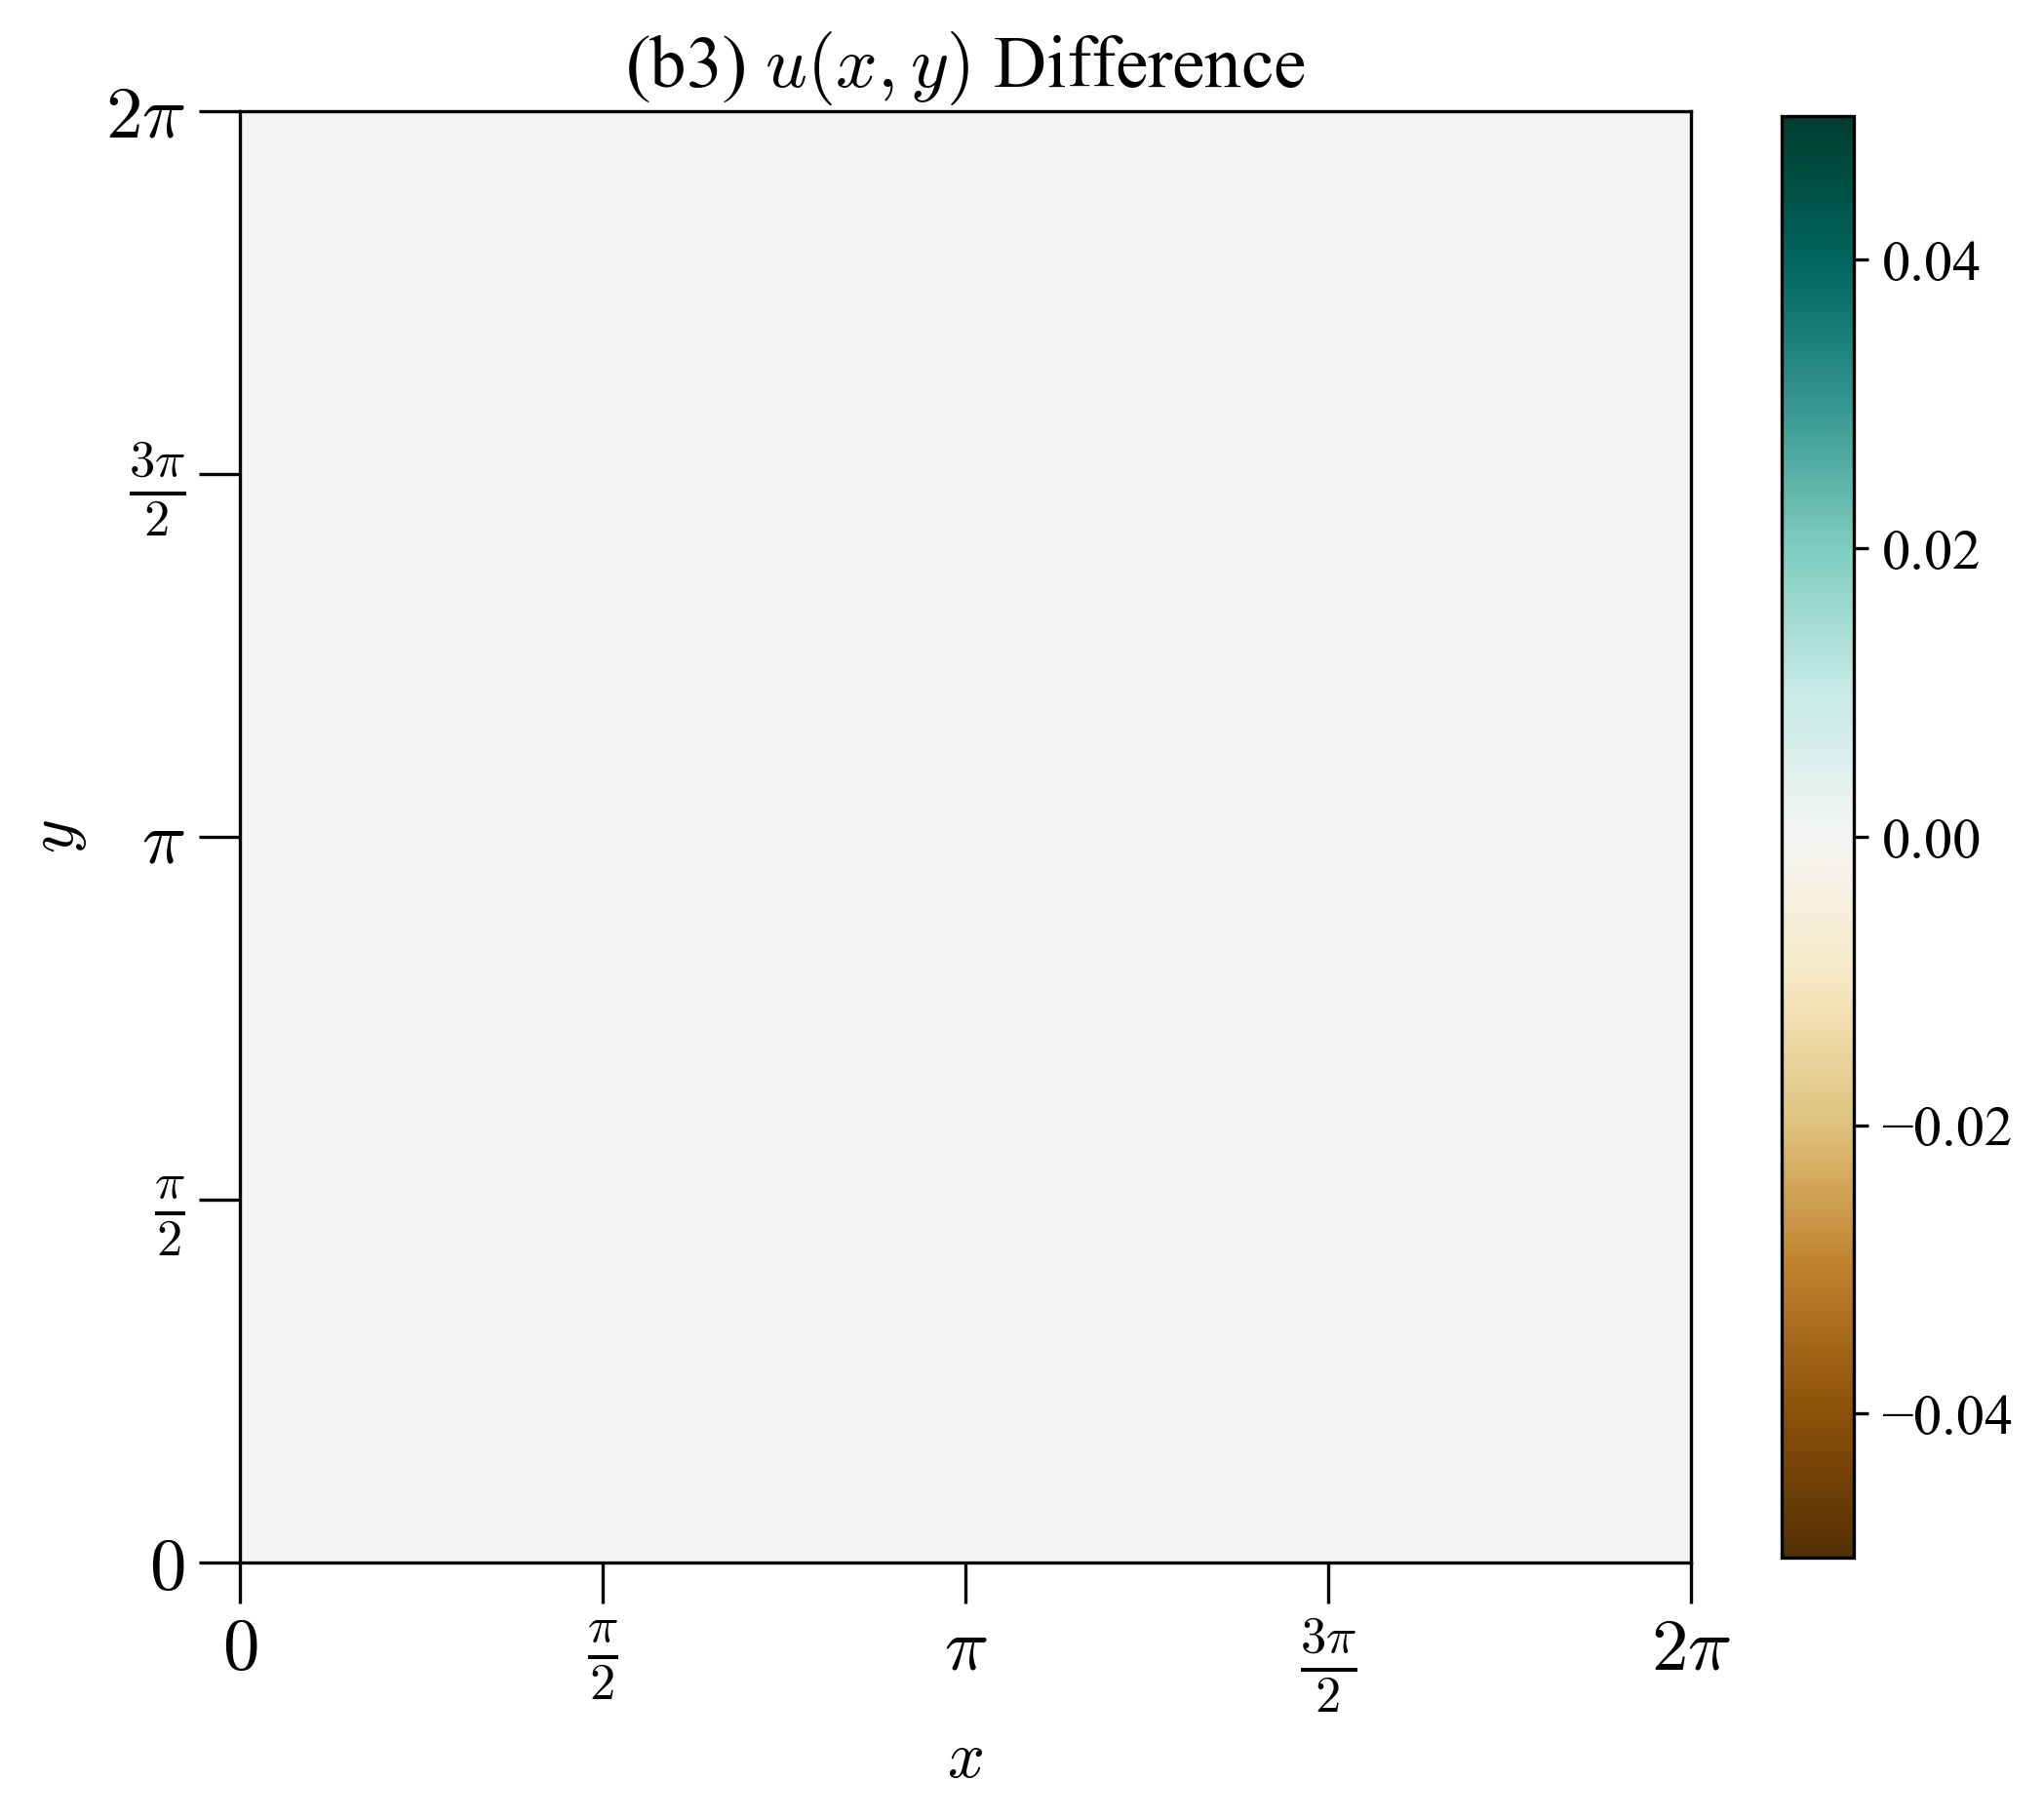

In [10]:
# Common Values
max_v           =  0.05
min_v           = -max_v
colorscheme     = "BrBG"

# Initialize
fig_CMap        = plt.figure(figsize=(8, 8), dpi=300)
ax_CMap         = fig_CMap.add_subplot()

ax_CMap.set_title(r'(b3) $u (x, y)$ Difference', fontsize=18)
im              = ax_CMap.imshow(mat_u - mat_u_sol, aspect='equal', cmap=colorscheme, extent=[0, 2 * np.pi, 0, 2 * np.pi], vmin=min_v, vmax=max_v)


# XY Lim : 0 to 2 pi
ticks           = [np.pi / 2 * i for i in [0, 1, 2, 3, 4]]
ax_CMap.set_xticks(ticks)
ax_CMap.set_yticks(ticks)

ax_CMap.set_xlabel(r"$x$", fontsize=16)
ax_CMap.set_ylabel(r"$y$", fontsize=16)

ticklabels      = [r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2 \pi$"]

ax_CMap.set_xticklabels(ticklabels)
ax_CMap.set_yticklabels(ticklabels)

ax_CMap.tick_params(axis='x', labelsize=18)                 # Tick font size x
ax_CMap.tick_params(axis='y', labelsize=18)                 # Tick font size y
ax_CMap.tick_params(axis='x', which='major', length=10)     # Tick Length Major
ax_CMap.tick_params(axis='y', which='major', length=10)     # Tick Length Major

# Color bar
cbar = plt.colorbar(im, ax=ax_CMap, shrink=0.8)
cbar.ax.tick_params(labelsize=14)

fig_CMap.savefig("./figures/u_Difference.pdf", format = "pdf")
fig_CMap.savefig("./figures/u_Difference.png", format = "png", dpi = 300)
fig_CMap.savefig("./figures/u_Difference.svg", format = "svg", transparent=True)

In [12]:
print(np.sum(mat_u - mat_u_sol))

-1.8938619937807666e-15
